In [161]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

import importlib
from pathlib import Path

import sys

sys.path.append(str(Path.home() / "Projects" / "MaxEnt" / "Code" / "numpy"))

import Basic_functions as bf
import Synthetic_data as sd
import R_roughness as rr
import D2_admm_solver as das

importlib.reload(bf)
importlib.reload(sd)
importlib.reload(rr)
importlib.reload(das)

<module 'D2_admm_solver' from '/Users/xunan/Projects/MaxEnt/Code/numpy/D2_admm_solver.py'>

In [154]:
# run the Converting.ipynb first
data = np.load('/Users/xunan/Projects/MaxEnt/Data/processed_numpy.npz')
Sb0 =   data['Sb0']
Sqs =   data['Sqs']
qs =    data['qs']
sigma = data['sigma']

In [155]:
# crop part of the data to run
sub_Sqs = Sqs[0:30, 0:30, 0:30, :]
sub_Sb0 = Sb0[0:30, 0:30, 0:30, :]
mask, lin2idx = bf.mask_brain(sub_Sb0, median_radius = 1, numpass = 4, vol_idx = [0, 1, 2, 3, 4], least_size = 100, keep_top = 3)
sub_Sqs = sub_Sqs[mask, :]

+-----------------------------------------------------------------------------+
Number of initial valid regions: 1
Sizes of each regions (1st is background): [26361   639]
+-----------------------------------------------------------------------------+
Number of kept regions: 1
Sizes of kept regions: [639]


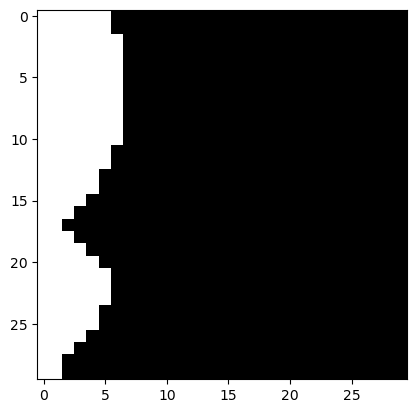

In [156]:
plt.imshow(np.fliplr(np.flipud(mask[28, :, :].T)), cmap='gray')
plt.show()

In [157]:
theta1 = np.linspace(0, 3, 50)
theta2 = np.linspace(0, 40, 50)
thetas, weights = bf.Cartesian(theta1, theta2)
R = rr.R_mask(mask, 25, order = 2)

In [158]:
lambdas, f_hat, history = das.admm( qs, thetas, weights, sub_Sqs, sigma = sigma,
                                    R_csr = R, f0 = None, normalize = True,
                                    Lambdas = None, rho = 5e-1, rho_ratio = 3,dynamic_rho = True,
                                    beta = 0.5, c = 1e-4, tol = 1e-2, epsilon = 1e-8, maxiter = 1,
                                    cg_rtol = 1e-10, cg_atol = 1e-50, cg_maxiter = 1000, 
                                    admm_tol = 1e-10, admm_maxiter = 100)


ADMM maximum iterations reached.


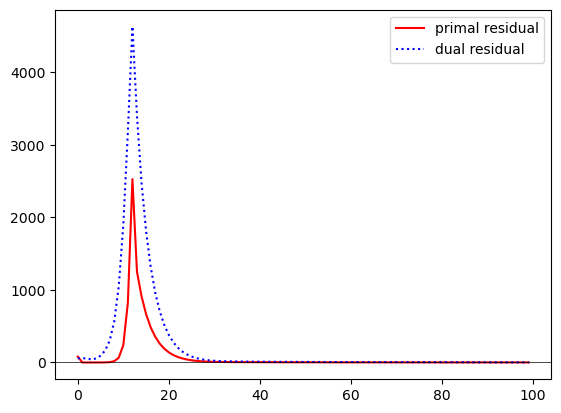

In [159]:
plt.plot(history[1][:], '-', color = 'red', label = 'primal residual')
plt.plot(history[2][:], ':', color = 'blue', label = 'dual residual')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.legend()
plt.show()


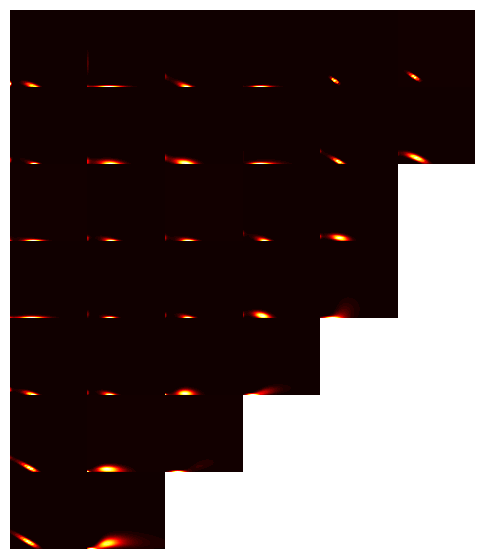

In [160]:
bf.contourf_mask(theta1, theta2, f_hat, lin2idx, axis = 2, slice = 19)